In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
X
# Load the Iris target values (y)
# y = pd.Series(iris.target, name='species')
# Display the first few rows of y
# y.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [2]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [3]:
wcss = []
cluster_range = range(1, 11) 
for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_) 


In [4]:
# wcss
# cluster_range

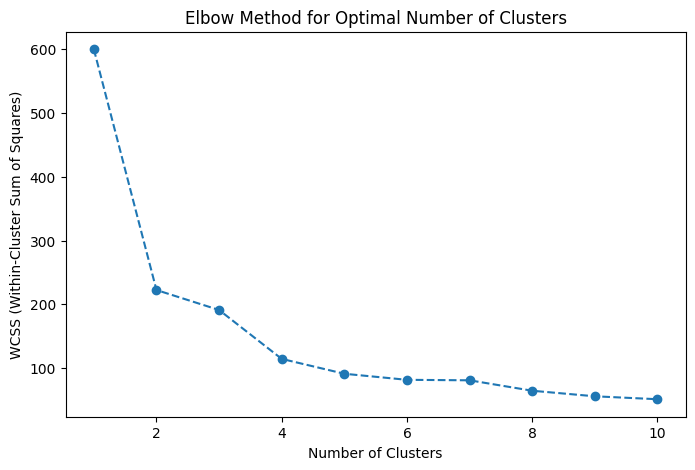

In [5]:
# wcss vs cluster_range

plt.figure(figsize=(8, 5))
plt.plot(cluster_range, wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.show()


In [6]:

optimal_clusters = 2
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
kmeans.fit(X_scaled)


KMeans(n_clusters=2, random_state=42)

In [7]:
from sklearn.metrics import silhouette_score

# Initialize an empty list to store the silhouette scores for different values of k
silhouette_scores = []

# Calculate silhouette scores for a range of cluster numbers
for k in cluster_range[1:]:  # Skip k=1, as silhouette is not defined for a single cluster
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    cluster_labels = kmeans.labels_
    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)



In [8]:
silhouette_scores

[0.5817500491982808,
 0.4798814508199817,
 0.3850454053045392,
 0.34503345350274617,
 0.3339432304006177,
 0.2664290993719981,
 0.34162906041313373,
 0.32439914389835445,
 0.33540615043919825]

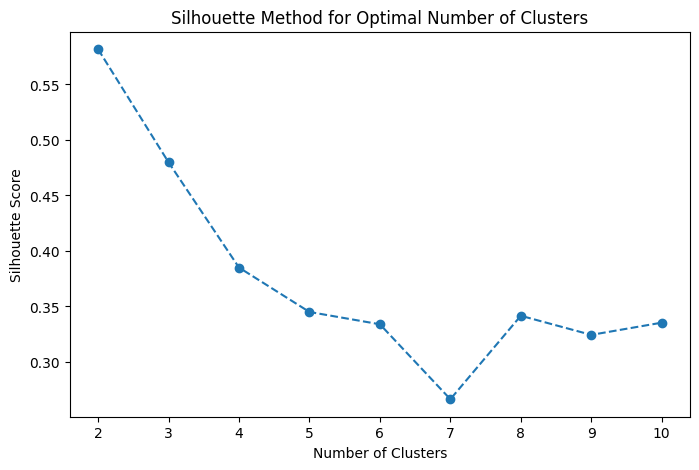

In [9]:

# Plot the silhouette scores for each number of clusters
plt.figure(figsize=(8, 5))
plt.plot(cluster_range[1:], silhouette_scores, marker='o', linestyle='--')
plt.title('Silhouette Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()


In [10]:

# Determine the optimal number of clusters based on the highest silhouette score
optimal_clusters_silhouette = cluster_range[1:][np.argmax(silhouette_scores)]
print(f'Optimal number of clusters based on Silhouette Score: {optimal_clusters_silhouette}')


Optimal number of clusters based on Silhouette Score: 2


In [11]:

# Apply KMeans clustering with the optimal number of clusters
kmeans_silhouette = KMeans(n_clusters=optimal_clusters_silhouette, random_state=42)
kmeans_silhouette.fit(X_scaled)

KMeans(n_clusters=2, random_state=42)

In [12]:
# optimal_clusters_silhouette
# optimal_clusters

In [14]:
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [15]:
X_scaled

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

In [16]:
new_data = np.array([[1.5, 2, 2.5, 3]]) 


In [17]:
new_data_scaled = scaler.transform(new_data)

In [18]:
new_data_scaled

array([[-5.26272451, -2.43394714, -0.71501483,  2.37025687]])

In [19]:

predicted_cluster = kmeans.predict(new_data_scaled)
# print(predicted_cluster[0])
print(f"Predicted Cluster for new data: {predicted_cluster[0]}")

Predicted Cluster for new data: 5
